<a href="https://colab.research.google.com/github/BernardOforiBoateng/Traffic_EDA/blob/main/Traffic_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Hamoye Internship/Practical Time Series Analysis & Forecast/traffic.csv/traffic.csv')

In [ ]:
df["DateTime"] = pd.to_datetime(df["DateTime"]) #convert column to datetime
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [ ]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [ ]:
#Drop the ID column I think ID does not effect to this dataset
df.drop('ID', axis=1, inplace=True)

In [ ]:
df.head()

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9


Extract Year, Month, Day, Hour from index

In [ ]:
#Exploring more features 
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date_no"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")
df.head()

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


Here's a function for making histogram with kde plot, for plotting all 4 junctions to study the distribution

In [ ]:
def hist_plot(junction=1):
    data = df[df['Junction'] == junction]
    f, ax = plt.subplots(figsize=(20, 5))
    ax = sns.histplot(data['Vehicles'], kde=True, stat='probability')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

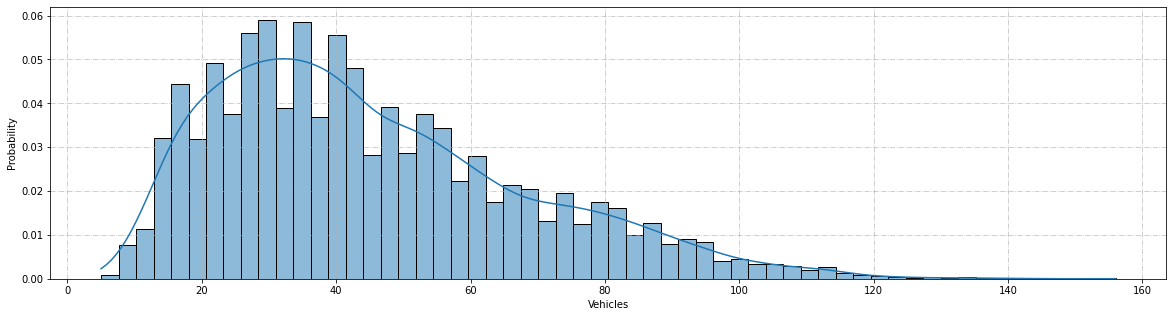

In [ ]:
# distribution at junction 1
hist_plot(1)

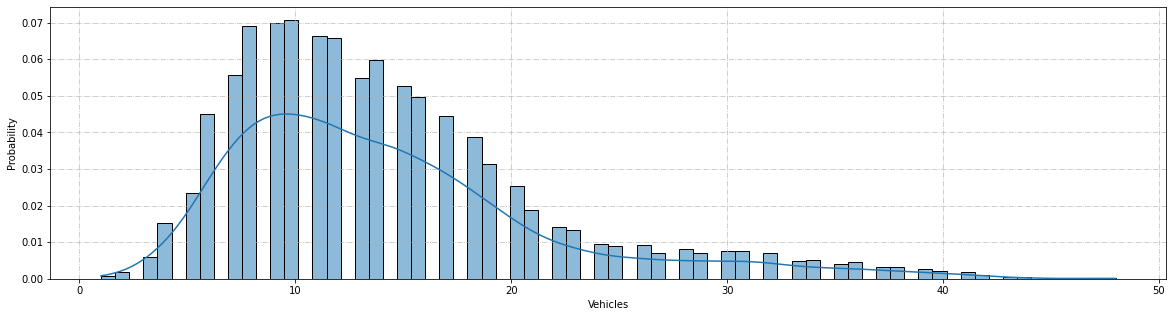

In [ ]:
# distribution at junction 2
hist_plot(2)

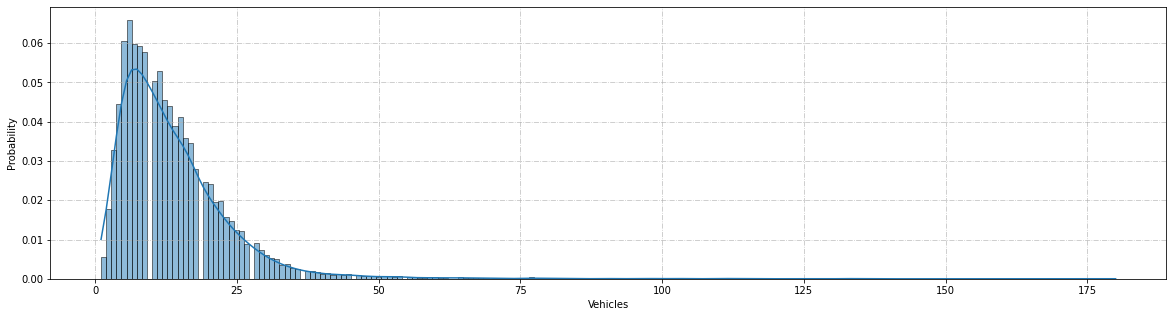

In [ ]:
# distribution at junction 3
hist_plot(3)

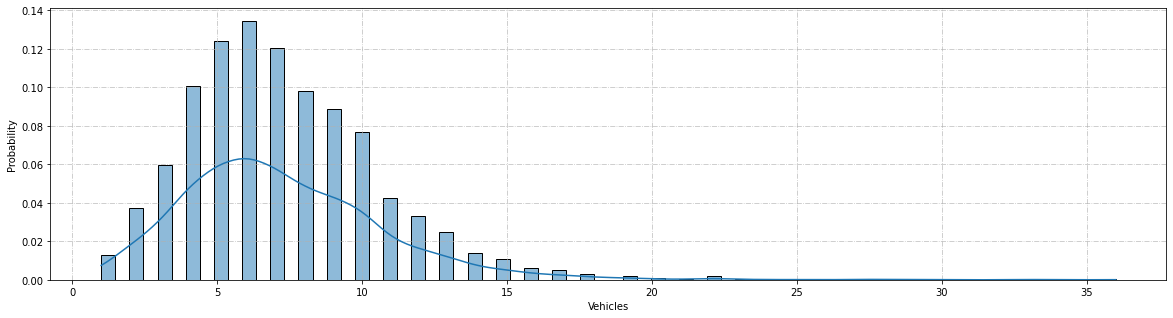

In [ ]:
# distribution at junction 4
hist_plot(4)

from the 4 plots we can see that the distribution at all 4 junctions skews to the right

Now we create a function to plot time series plots to study the number of vehicles at each junctions throughout the years

In [ ]:
def ts_plot(junction=1):
    f, ax = plt.subplots(figsize=(20, 5))
    data=df[df.Junction == junction]
    ax = sns.lineplot(data=data, y='Vehicles', x='DateTime', ax=ax)
    start = data.head(1)
    end = data.tail(1)
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

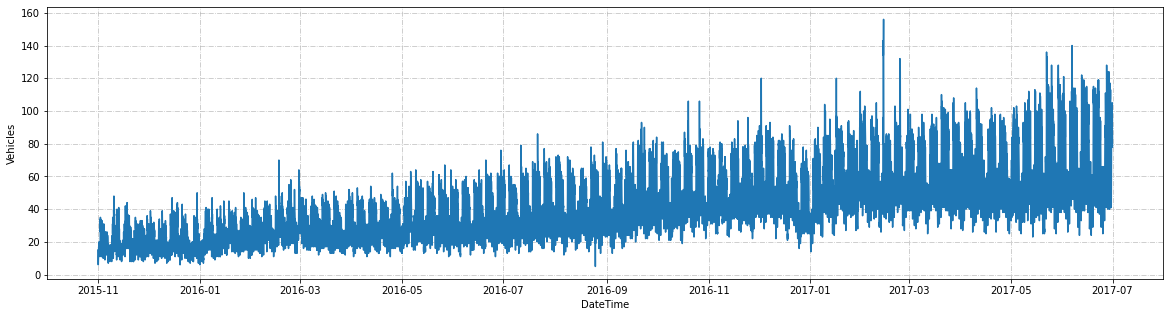

In [ ]:
# concentration of vehicles at junction 1
ts_plot(1)

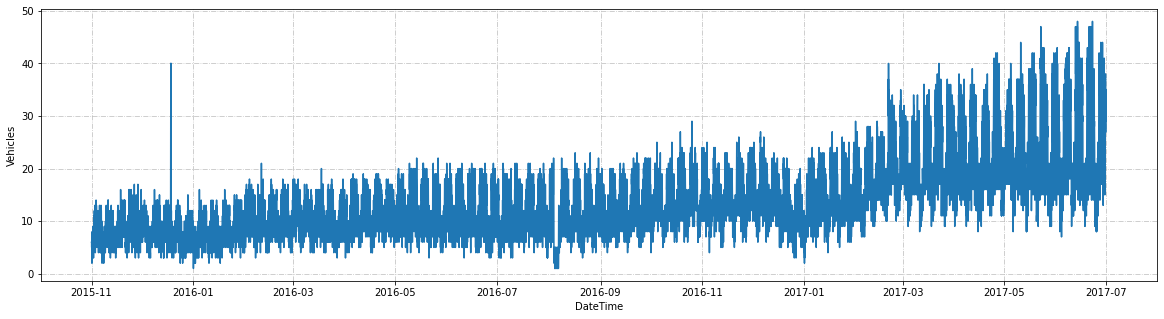

In [ ]:
# concentration of vehicles at junction 2
ts_plot(2)

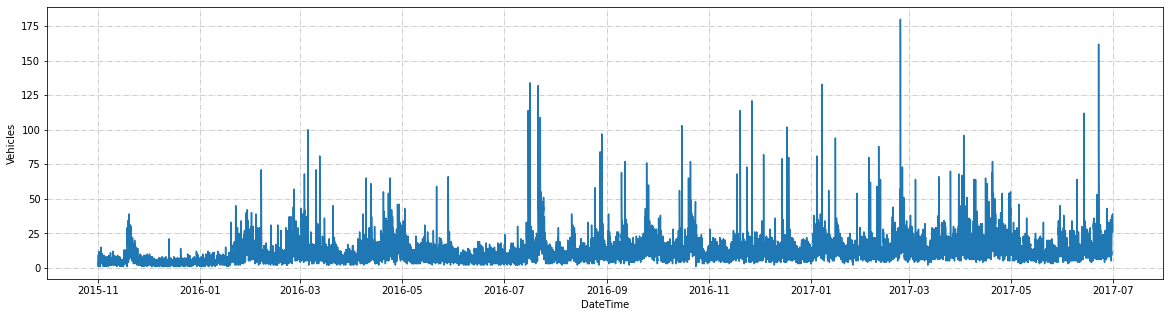

In [ ]:
# concentration of vehicles at junction 3
ts_plot(3)

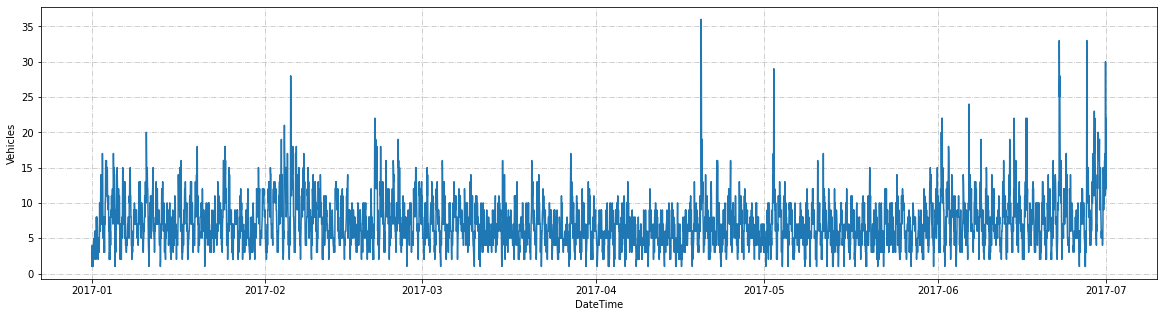

In [ ]:
# concentration of vehicles at junction 4
ts_plot(4)

from the plots above:

* junction 1 has an upward trend
* the plot for junction is fairl recent as it starts only from 2017



create a function to further understand the trend for tne newly created features, i.e. month, week, day, hour and date number

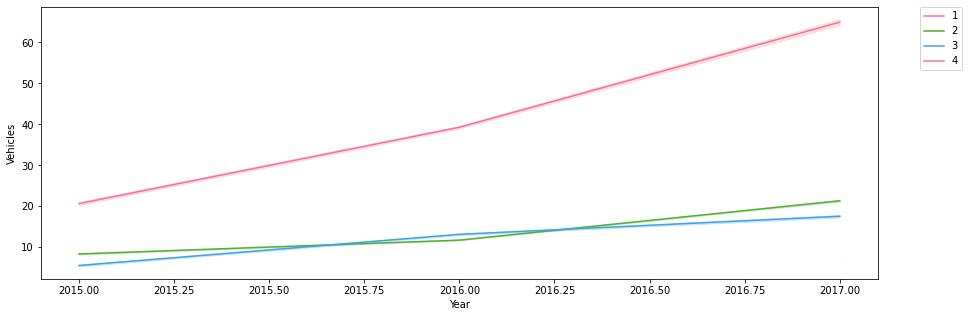

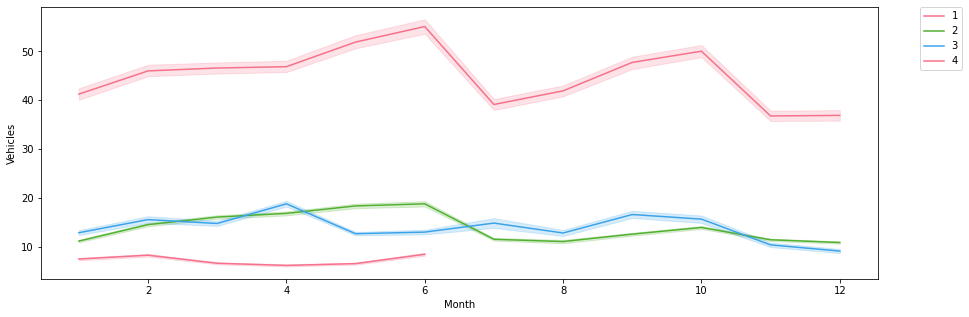

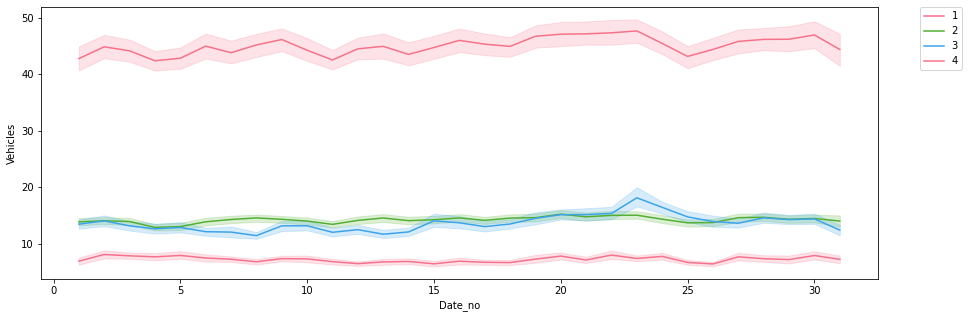

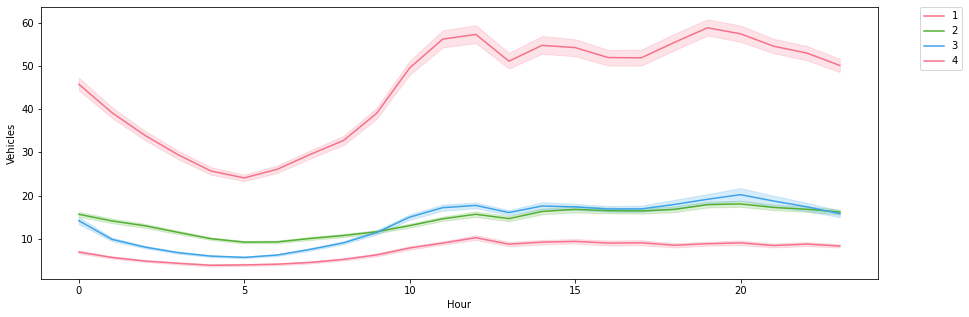

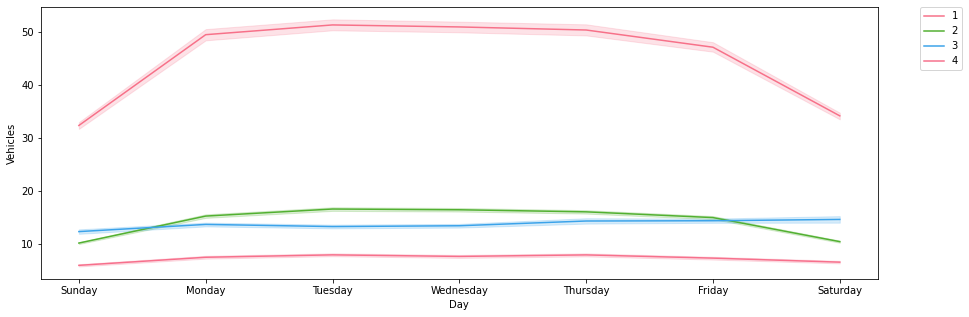

In [ ]:
new_features = ['Year', 'Month', 'Date_no', 'Hour', 'Day']

for i in new_features:
    plt.figure(figsize=(15, 5))
    ax = sns.lineplot(x=df[i], y='Vehicles', data=df, hue='Junction', palette = 'husl')
    plt.legend(bbox_to_anchor = (1.05, 1), loc=2, borderaxespad=0.)

From the above plot following things can be concluded:

* For the Yearly feature, there has been an upward trend for all junctions except for the 4th junction which only starts from 2017. 

* We can see that there is an influx in the first and second junctions around June, this could be due to the season and increased activities

* Th e Monthly feature shows great consistency accross the data

* For the day feature, we can see that are peaks during morning and evening times and a decline during night hours. This is as per expectation.

* For weekly patterns, Sundays enjoy smoother traffic as there are lesser vehicles on roads. Whereas Monday to Friday the traffic is steady.

Correlation matrix (heatmap style)

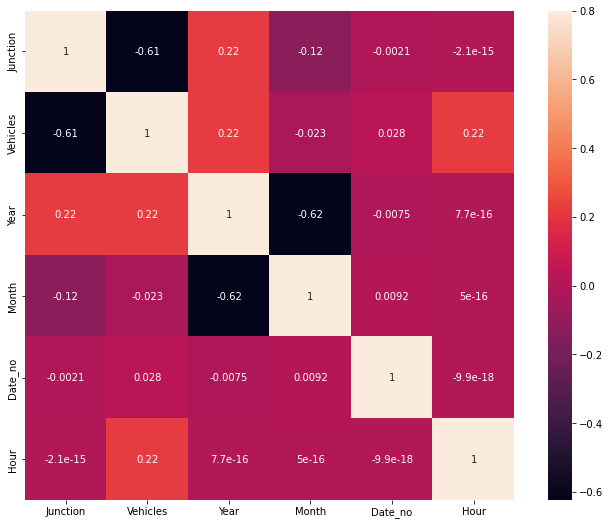

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True);

The highest correlations are certainly with the preexisting feature.

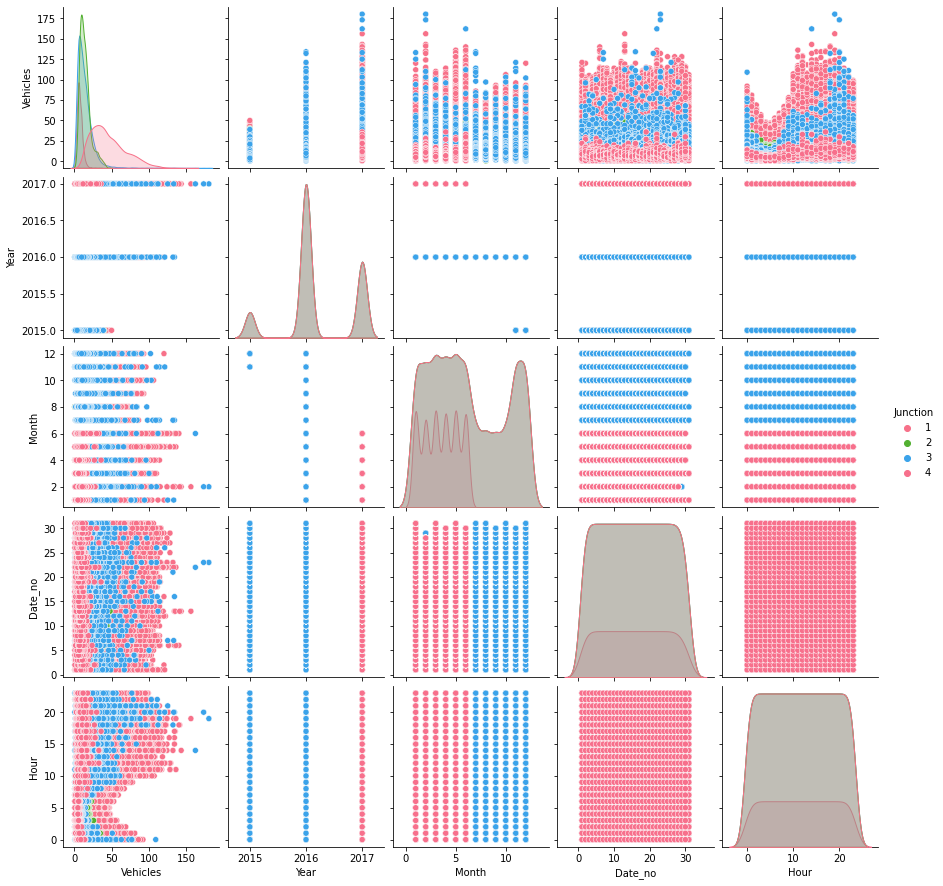

In [ ]:
# Lets plot a pair plot to represent the overall data.
## pair plot
sns.pairplot(data=df, hue= "Junction",palette='husl')

**Conclusion**

The span of data from all 4 junctions is not the same. Data provided for the 4th junction is limited to only 2017.
The yearly trend for Junctions 1,2 and 3 have diffrent slopes.
Junction number 1 has a more strong weekly seasonality in comparison to the other junctions.